In [1]:
import torch
from torch.nn import Linear
import matplotlib.pyplot as plt

In [8]:
# construct a linear model
torch.manual_seed(1)
model = Linear(in_features=1, out_features=1)
print(model.bias, model.weight)
x = torch.tensor([[2.0],[3.0]])
print(model(x))

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)
tensor([[0.5891],
        [1.1044]], grad_fn=<AddmmBackward>)


Text(0.5, 0, 'x')

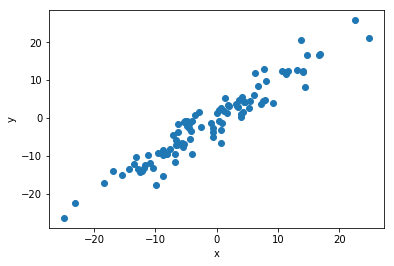

In [2]:
X = torch.randn(100, 1)*10
y = X + torch.randn(100, 1)*3
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [3]:
# y = w*x + b linear regression
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

def forward(x):
    y = w*x+b
    return y

x = torch.tensor([[4],[7]])
forward(x)

tensor([[13.],
        [22.]], grad_fn=<AddBackward0>)

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]
tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)


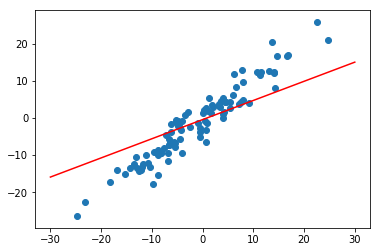

epoch: 0 loss: 29.018465042114258
epoch: 1 loss: 22.18675994873047
epoch: 2 loss: 17.593765258789062
epoch: 3 loss: 14.505633354187012
epoch: 4 loss: 12.429123878479004
epoch: 5 loss: 11.0326509475708
epoch: 6 loss: 10.093328475952148
epoch: 7 loss: 9.461325645446777
epoch: 8 loss: 9.035930633544922
epoch: 9 loss: 8.749435424804688
epoch: 10 loss: 8.556334495544434
epoch: 11 loss: 8.426032066345215
epoch: 12 loss: 8.337964057922363
epoch: 13 loss: 8.278304100036621
epoch: 14 loss: 8.237756729125977
epoch: 15 loss: 8.210076332092285
epoch: 16 loss: 8.191061019897461
epoch: 17 loss: 8.177887916564941
epoch: 18 loss: 8.168655395507812
epoch: 19 loss: 8.16208553314209
epoch: 20 loss: 8.157320976257324
epoch: 21 loss: 8.153786659240723
epoch: 22 loss: 8.151086807250977
epoch: 23 loss: 8.148963928222656
epoch: 24 loss: 8.147241592407227
epoch: 25 loss: 8.145796775817871
epoch: 26 loss: 8.144552230834961
epoch: 27 loss: 8.143451690673828
epoch: 28 loss: 8.142461776733398
epoch: 29 loss: 8.141

In [4]:
# custom model inherits nn
# construct a model with a class
import torch.nn as nn
import numpy as np
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = self.linear(x)
        return pred

# RAMDOM PRACTICE OF MODEL
torch.manual_seed(1)
model = LR(1, 1)
print(list(model.parameters()))
x = torch.tensor([[1.0],[2.0]])
print(model.forward(x))

[w, b] = model.parameters()
def get_params():
    return (w[0][0].item(), b[0].item())

def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1*x1+b1
    plt.plot(x1, y1, 'r')
    plt.scatter(X, y)
    plt.show()
plot_fit('Initial Model')

# train this model
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    print('epoch:', i, 'loss:', loss.item())
    
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Text(0.5, 0, 'EPOCHS')

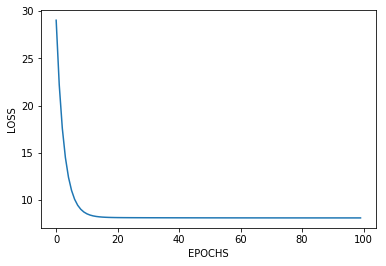

In [6]:
plt.plot(range(epochs), losses)
plt.ylabel('LOSS')
plt.xlabel('EPOCHS')

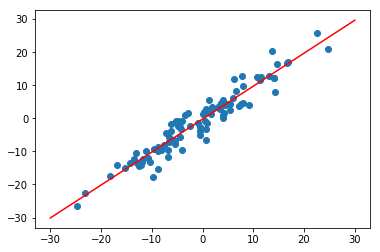

In [7]:
plot_fit('Trained Model')

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms.functional as TF
from torch.autograd import Variable
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('diabetes.csv',header=None,skiprows=1)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
# split datasets into train and test datasets
num_obs = df.shape[0]
train = df[:int(num_obs*0.7)]
test = df[int(num_obs*0.7):]

x_train = train.iloc[:, 0:8]
y_train = train[[8]]

x_test = test.iloc[:, 0:8]
y_test = test[[8]]

x_train = torch.tensor(x_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
x_test = torch.tensor(x_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.long)

y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [4]:
class LogisticR(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticR, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [5]:
model = LogisticR(8, 2)
# model.cuda() # using CPU

criterion = nn.CrossEntropyLoss() # BCELoss() is also a good function
epochs = 1000
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [11]:
all_accuracy = []
all_loss = []
counter = 0
for epoch in range(epochs+1):
    train_inputs = Variable(x_train)
    true_train = Variable(y_train)
    
    optimizer.zero_grad()
    
    train_outputs = model(train_inputs)
    
    loss = criterion(train_outputs, true_train)
    loss.backward()
    optimizer.step()
    
    if epoch % 50 == 0:
        all_loss.append(loss.item())
        print('epoch:', epoch, 'loss:', loss.item())

epoch: 0 loss: 5.415095329284668
epoch: 50 loss: 1.5260754823684692
epoch: 100 loss: 5.737933158874512
epoch: 150 loss: 1.5738328695297241
epoch: 200 loss: 5.602487087249756
epoch: 250 loss: 1.5666464567184448
epoch: 300 loss: 5.616183280944824
epoch: 350 loss: 1.5738039016723633
epoch: 400 loss: 5.599633693695068
epoch: 450 loss: 1.578579306602478
epoch: 500 loss: 5.586792469024658
epoch: 550 loss: 1.5833855867385864
epoch: 600 loss: 5.5739641189575195
epoch: 650 loss: 1.5880396366119385
epoch: 700 loss: 5.5613813400268555
epoch: 750 loss: 1.5925366878509521
epoch: 800 loss: 5.549064636230469
epoch: 850 loss: 1.5968904495239258
epoch: 900 loss: 5.536993503570557
epoch: 950 loss: 1.6010973453521729
epoch: 1000 loss: 5.525188446044922


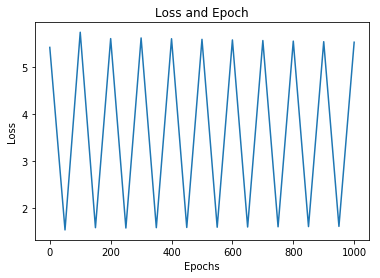

In [12]:
epoch = [x for x in range(0, 1001, 50)]
import matplotlib.pyplot as plt
plt.title('Loss and Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epoch, all_loss)